# MNIST数据集分类

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_digits
mnist = load_digits()

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
X, y = mnist["data"], mnist["target"]
X.shape

(1797, 64)

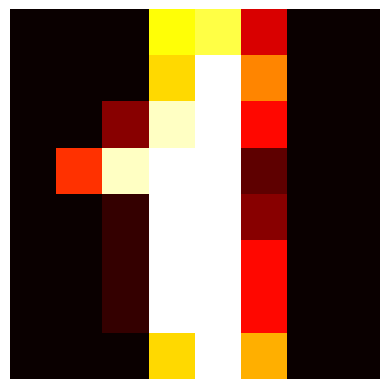

In [5]:
import matplotlib.pyplot as plt
some_digit = X[1]
some_digit_image = some_digit.reshape(8,8)
plt.imshow(some_digit_image, cmap="hot")
plt.axis("off")
plt.show()

In [6]:
y[1].dtype

dtype('int32')

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [8]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [9]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [10]:
sgd_clf.predict([some_digit])

array([False])

# 性能测量
## 交叉验证

In [17]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=5, scoring="accuracy")

array([0.98958333, 0.99305556, 0.9825784 , 0.98606272, 0.95470383])

## 混淆矩阵

In [19]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=5)
confusion_matrix(y_train_5, y_train_pred)

array([[1282,   20],
       [   7,  128]], dtype=int64)

## 精度，召回率，F1

In [20]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8648648648648649

In [21]:
recall_score(y_train_5,y_train_pred)

0.9481481481481482

In [22]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.9045936395759717

In [24]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-3394.07249809])

In [25]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=5, method="decision_function")
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

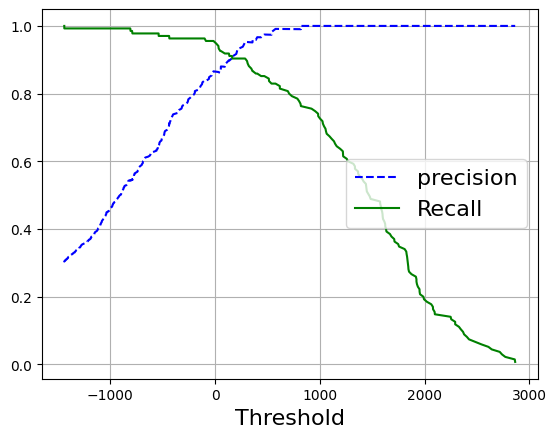

In [29]:
plt.plot(thresholds,precisions[:-1], 'b--', label="precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.legend(loc="center right", fontsize=16) # Not shown in the book
plt.xlabel("Threshold", fontsize=16)        # Not shown
plt.grid(True)                              # Not shown
#plt.axis([-50000, 50000, -0.1, 1.1])  
plt.show()

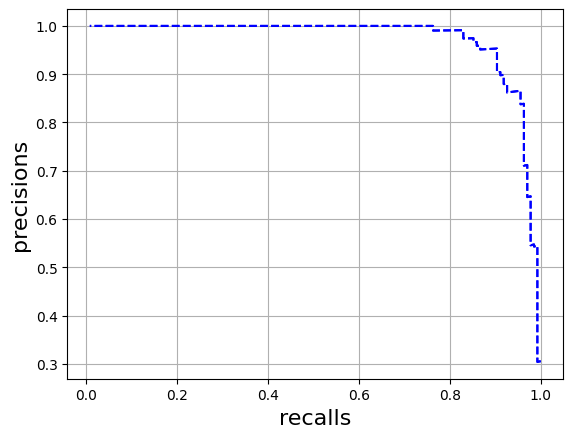

In [31]:
plt.plot(recalls[:-1],precisions[:-1], 'b--', label="precision")
plt.grid(True)  
plt.xlabel("recalls", fontsize=16) 
plt.ylabel("precisions", fontsize=16) 
plt.show()

# ROC曲线

In [32]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)


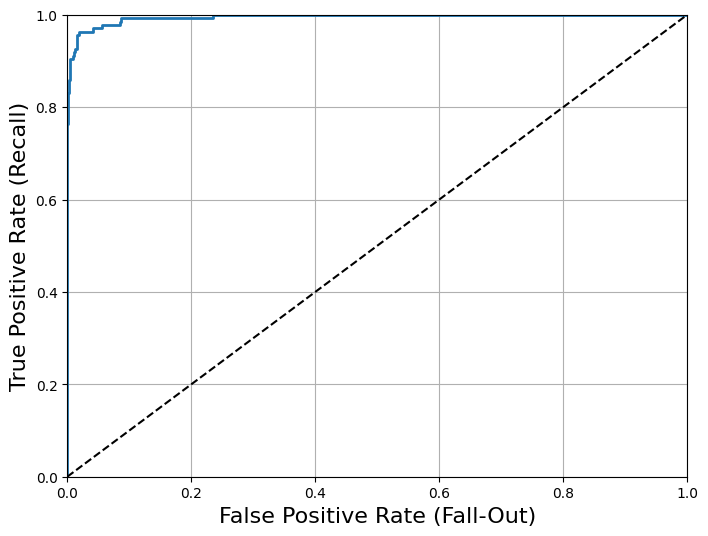

In [37]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
plt.show()

In [38]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9951072424190703

## 随机森林比较

In [39]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=5, method="predict_proba")
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

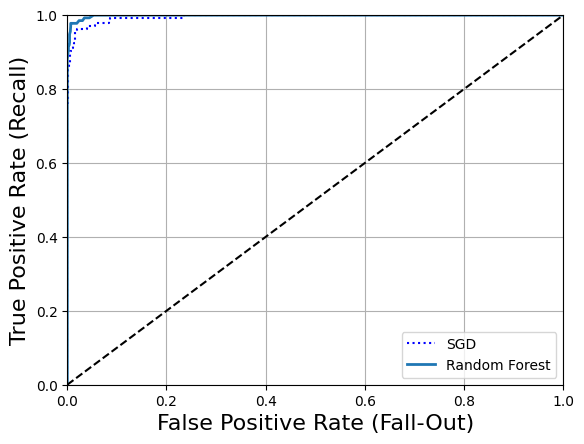

In [43]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [44]:
roc_auc_score(y_train_5, y_scores_forest)

0.9988621493997838